# Predicting Car Prices

This project is meant to practice the machine learning workflow for the k nearest neighbors alorithm.  The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.  More can be read about the dataset here: https://archive.ics.uci.edu/ml/datasets/automobile


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num_doors', 'body_style', 
        'drive-wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cols = [word.replace('-','_') for word in cols]
cars = pd.read_csv('imports-85.data', names=cols)

In [2]:

cars.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Listing numeric (ordinal) columns that can be used as features for the k nearest neighbors algorithm.

- symboling
- normalized-losses
- number of doors
- wheel_base
- length
- width
- height
- curb_weight
- num_of_cylinders
- engine_size
- compression_rate
- bore
- stroke
- horsepower
- peak_rpm
- city_mpg
- highway_mpg

In [3]:
cars.normalized_losses = cars.normalized_losses.replace('?',np.nan)


In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
continuous_values_cols = [word.replace('-','_') for word in continuous_values_cols]
numeric_cars = cars[continuous_values_cols].copy()

In [5]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.dtypes

normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                  object
stroke                object
compression_rate     float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

# Data Cleaning

In [7]:
numeric_cars = numeric_cars.replace('?',np.nan)

In [8]:
numeric_cars = numeric_cars.astype(float)

In [9]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [10]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])

In [11]:
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [12]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [14]:
#rescaling the numeric data so they range from 0 and 1
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [15]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(k,train_cols,target_cols,df):
    #randomizing the dataframe index so the input order doesn't bias the result
    random_index = np.random.permutation(df.shape[0])
    random_df = df.iloc[random_index]
    
    #splitting data into training and test set
    #data will be split 25-75
    last_train_row = int(len(random_df)*.75)
    train_set = random_df[0:last_train_row]
    test_set = random_df[last_train_row:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[train_cols]],train_set[target_cols])
    predictions = knn.predict(test_set[[train_cols]])
    mse = mean_squared_error(test_set[target_cols],predictions)
    rmse = np.sqrt(mse)
    return rmse
    
#Training and tsting univariate models using different numeric columns in the data set

rmse_result = {} 
k_vals = [1,3,5,7,9]
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_result[col] = {}
    for k in k_vals:
        rmse_result[col][k] = knn_train_test(k,col,'price',numeric_cars)
    
    


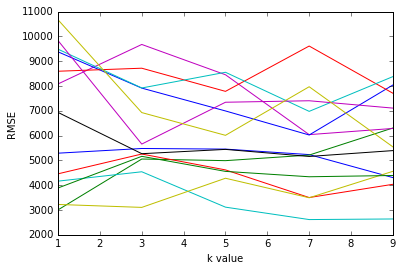

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

for k,v in rmse_result.items():
    lists = sorted(v.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model

In [18]:
#Finding the average rmse across k values
rmse_avg = {}
for k,v in rmse_result.items():
    rmse_avg[k] = np.mean(list(v.values()))

rmse_avg_series = pd.Series(rmse_avg)
rmse_avg_series.sort_values(inplace=True)
rmse_avg_series

horsepower           3414.641231
width                3732.615986
curb_weight          4374.254134
city_mpg             4468.247610
wheel_base           4914.674960
highway_mpg          5153.699081
length               5640.454056
bore                 7424.736657
compression_rate     7469.471222
normalized_losses    7669.955065
height               7708.019504
peak_rpm             8262.826455
stroke               8483.336123
dtype: float64

In [19]:
def knn_train_test_multi(train_cols,target_cols,df):
    #randomizing the dataframe index so the input order doesn't bias the result
    random_index = np.random.permutation(df.shape[0])
    random_df = df.iloc[random_index]
    
    #splitting data into training and test set
    #data will be split 25-75
    last_train_row = int(len(random_df)*.75)
    train_set = random_df[0:last_train_row]
    test_set = random_df[last_train_row:]
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_cols],train_set[target_cols])
    predictions = knn.predict(test_set[train_cols])
    mse = mean_squared_error(test_set[target_cols],predictions)
    rmse = np.sqrt(mse)
    return rmse

#choosing the top 5 features to iterate over
features = rmse_avg_series.index
features = list(features)
top_5_feat = features[:5]
#store the rmse values for increasing number of features
rmse_5_feat = {}
helper_list = []

for i, feat in enumerate(top_5_feat):
    #key is the number of features
    helper_list.append(feat)
    rmse_5_feat[str(helper_list)] = knn_train_test_multi(helper_list,'price',numeric_cars)
    
rmse_5_series = pd.Series(rmse_5_feat)

In [20]:
rmse_5_series

['horsepower', 'width', 'curb_weight', 'city_mpg', 'wheel_base']    2994.180509
['horsepower', 'width', 'curb_weight', 'city_mpg']                  3194.189931
['horsepower', 'width', 'curb_weight']                              2171.046130
['horsepower', 'width']                                             2874.354098
['horsepower']                                                      3439.423552
dtype: float64

# Multivariate Model

For the top 3 models in the last step I will vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [44]:
def knn_train_test_multi_k(train_cols,target_cols,df):
    #randomizing the dataframe index so the input order doesn't bias the result
    random_index = np.random.permutation(df.shape[0])
    random_df = df.iloc[random_index]
    
    #splitting data into training and test set
    #data will be split 25-75
    last_train_row = int(len(random_df)*.75)
    train_set = random_df[0:last_train_row]
    test_set = random_df[last_train_row:]
    k_vals = range(1,25)
    k_rmse_dict = {}
    for k in k_vals:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_cols],train_set[target_cols])
        predictions = knn.predict(test_set[train_cols])
        mse = mean_squared_error(test_set[target_cols],predictions)
        rmse = np.sqrt(mse)
        k_rmse_dict[k] = rmse
    return k_rmse_dict


top_5_4_3 = {'top_5': ['horsepower', 'width', 'curb_weight', 'city_mpg', 'wheel_base'],
            'top_4':['horsepower', 'width', 'curb_weight', 'city_mpg'],
            'top_3':['horsepower', 'width', 'curb_weight']}
optimal_rmse = {}
for key, val in top_5_4_3.items():
    optimal_rmse[key] = knn_train_test_multi_k(val,'price',numeric_cars)

In [45]:
optimal_rmse

{'top_3': {1: 3323.4371706790216,
  2: 3579.8900752649365,
  3: 3077.493933137275,
  4: 2906.024268905989,
  5: 2924.196934169093,
  6: 2987.6815604668805,
  7: 3110.517522101768,
  8: 3143.650347307641,
  9: 3098.5224479492504,
  10: 3253.9471093415386,
  11: 3446.1420552527084,
  12: 3607.79152106242,
  13: 3723.6872716864764,
  14: 3816.5595085748364,
  15: 3945.152160014172,
  16: 4010.995278252775,
  17: 4108.682167773164,
  18: 4183.884441083414,
  19: 4261.867966591929,
  20: 4234.802584918841,
  21: 4233.469199232587,
  22: 4218.529300608876,
  23: 4258.326879447411,
  24: 4338.0372968327365},
 'top_4': {1: 2786.549845098,
  2: 3260.313145070818,
  3: 2813.5992056787472,
  4: 2535.203210277622,
  5: 2274.6639553577847,
  6: 2136.7858536394624,
  7: 2075.020487033476,
  8: 2121.723913951651,
  9: 2122.794534951042,
  10: 2166.1657268719096,
  11: 2214.270957804086,
  12: 2231.553897059021,
  13: 2294.253328266413,
  14: 2407.2299675449913,
  15: 2506.688075541311,
  16: 2582.825

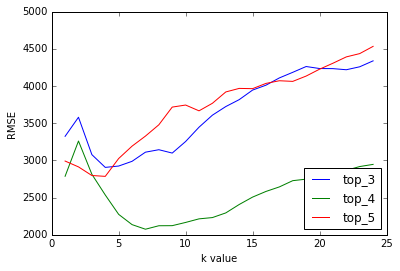

In [46]:
for k,v in optimal_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(optimal_rmse.keys(),loc='lower right')

It is shown in the graph above that a larger number of features paired with a higher hyperparameter value does not always result in a lower root means squared error value.  It did, however, result in far less variance in rmse as the calculation spanned k values from 1 to 25.  Further analysis would be needed to figure out why the rmse increases so drastically with the k value.  This test was ran multiple times, randomly indexing the dataset each time so as to not bias the dataset in any way.  The result seemed to be consistant each time.  However, one thing that I have noticed is that 'Wheel Base' is not a predictor of car price.  I've made this conclusion because the model that didn't use this feature was regularly more precient than the model that did.